In [29]:
import numpy as np
import pandas as pd
import os
from openpyxl import utils
import warnings
import statistics
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.stats import fisher_exact

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [30]:
统计 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据1.xlsx', sheet_name='统计用100例')
#交差 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据.xlsx', sheet_name='交差100例')
不良反应=pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/不良反应总结.xlsx')
不良等级=pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/不良反应总结等级.xlsx')
卡铂=pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/铂类药物列表.xlsx')

C:\Users\NC-O10\AppData\Local\Temp\ipykernel_14032\592733351.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  统计 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据1.xlsx', sheet_name='统计用100例')


In [31]:
## 一. 描述性分析

In [32]:
#年龄recoding
from datetime import datetime
确诊年龄= 统计['确诊年龄']
df = pd.DataFrame(确诊年龄)

# Remove rows with NA values
年龄 = df.dropna()
#print(年龄)
中位数_年龄=np.mean(年龄)
年龄max=np.max(年龄)
年龄min=np.min(年龄)
print(中位数_年龄)
print(年龄min)
print(年龄max)
#recode 年龄 greater than mean=1, lower than mean=0
# Assuming you have a DataFrame with an 'Age' column
# Sample age values with NA
ages = 统计['确诊年龄']
年龄_中位 = pd.DataFrame({'Age': ages})
# Fill NA values with a specific value (e.g., 0)
年龄_中位['Age'] = 年龄_中位['Age'].fillna(64)

#print(年龄_中位)
年龄recode = pd.DataFrame({'Age': 统计['确诊年龄']})

# Calculate the mean age
mean_age = 64.1

# Create a new column for recoded categories
年龄recode['Age_Category'] = ''
年龄recode=年龄recode.fillna(0)
# Recode ages based on mean
年龄recode.loc[年龄recode['Age'] > mean_age, 'Age_Category'] = '1'
年龄recode.loc[年龄recode['Age'] < mean_age, 'Age_Category'] = '0'

# Print the updated DataFrame
#print(年龄recode)
ALK=统计['ALK']
ALK=统计['ALK'].fillna(0)
ALK_recoded = ALK.where(ALK != '阴性', 0)
pfs=统计['有无PFS事件']

#print(ALK_recoded)
#calculate the fisher's exact test p-value
from scipy.stats import fisher_exact
import pandas as pd
# Assuming you have a DataFrame with exposure and outcome columns
紫杉醇_年龄 = pd.DataFrame({'Exposure': 年龄recode['Age_Category'],
                   'Outcome': pfs})
# Use replace() method to recode the variable
# Extract the exposure and outcome columns as separate variables
exposure = 紫杉醇_年龄['Exposure']
outcome = 紫杉醇_年龄['Outcome']
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(pd.crosstab(exposure, outcome))
# Print the results
#print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

确诊年龄    64.22093
dtype: float64
确诊年龄    38.0
dtype: float64
确诊年龄    81.0
dtype: float64
p-value: 0.027270605448283327


c:\Users\NC-O10\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\NC-O10\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\NC-O10\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return re

In [33]:
#性别
sex=统计['性别'].describe()
print(sex)

紫杉醇_sex = pd.DataFrame({'Exposure': 统计['性别'],'Outcome': pfs})

exposure = 紫杉醇_sex['Exposure']
outcome = 紫杉醇_sex['Outcome']
p_value = fisher_exact(pd.crosstab(exposure, outcome))
print("p-value:", p_value)

count     98
unique     2
top        男
freq      96
Name: 性别, dtype: object
p-value: SignificanceResult(statistic=0.7777777777777778, pvalue=1.0)


In [34]:
#清病理
病理=统计['清病理'].value_counts()
print(病理)
import numpy as np

qbl=pd.DataFrame(统计['清病理'])
qblfilled=qbl.fillna(0)

def recode(value, mapping):
    return np.vectorize(mapping.get)(value, value)

# Example usage
original_values = qblfilled
mapping = {
    "鳞状细胞癌": 1,
    "非小细胞癌": 2,
    "腺癌": 3,
}

统计['清病理']=统计['清病理'].fillna(0)
qblrecoded_values = recode(original_values, mapping)
qbl1=np.where(qblrecoded_values==1,1,0)
统计['清病理1']=qbl1
qbl2=np.where(qblrecoded_values==2,1,0)
统计['清病理2']=qbl2
qbl3=np.where(qblrecoded_values==3,1,0)
统计['清病理3']=qbl3
from scipy.stats import fisher_exact
import pandas as pd

# Create a DataFrame with two columns
data = {'Column1': 统计['清病理1'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("鳞状细胞癌:", p_value)

data = {'Column1': 统计['清病理2'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("非小细胞癌:", p_value)

data = {'Column1': 统计['清病理3'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("腺癌:", p_value)

鳞状细胞癌    85
非小细胞癌    11
腺癌        4
Name: 清病理, dtype: int64
鳞状细胞癌: SignificanceResult(statistic=1.15625, pvalue=1.0)
非小细胞癌: SignificanceResult(statistic=1.118421052631579, pvalue=1.0)
腺癌: SignificanceResult(statistic=0.42857142857142855, pvalue=0.6324648547328959)


In [35]:
统计['清病理'] = 统计['清病理'].fillna('0')

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['清病理'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

Chi-square statistic: 0.5655227485452846
联合免疫用药通用名: 0.7536996185224316


In [36]:
#TNM
#只分三四。
TNM=统计['TNM分期'].value_counts()
#print(TNM)
#recode TNM
#original_tnm = 统计['TNM分期']
#recode_mapping = {'IVA': 'IV', 'IVB': 'IV', 'IIIB': 'III', 'IIIC': 'III'}
#tnm_recoded = [recode_mapping.get(string, string) for string in original_tnm]
#print(tnm_recoded)
#统计['TNMre']=tnm_recoded
#TNMrecoded=统计['TNMre'].value_counts()
print(TNM)
#fisher test
#data = {'Column1': 统计['TNMre'], 'Column2': 统计['有无PFS事件']}
#df = pd.DataFrame(data)
#contingency_table = pd.crosstab(df['Column1'], df['Column2'])
#p_value = fisher_exact(contingency_table)
#print("TNM:", p_value)

IV      35
IIIB    32
IVA     18
IVB     10
IIIC     5
Name: TNM分期, dtype: int64


In [37]:
#EGFR
EGFR=统计['EGFR'].value_counts()
统计['EGFR'] = 统计['EGFR'].fillna('阴性')
print(EGFR)

#fisher test
#data = {'Column1': 统计['EGFR'], 'Column2': 统计['有无PFS事件']}
#df = pd.DataFrame(data)
#contingency_table = pd.crosstab(df['Column1'], df['Column2'])
#p_value = fisher_exact(contingency_table)
#print("EGFR:", p_value)

阴性    39
Name: EGFR, dtype: int64


In [38]:
#ALK
ALK=统计['ALK'].value_counts()
统计['ALK'] = 统计['ALK'].fillna('阴性')
print(ALK)



阴性    38
Name: ALK, dtype: int64


In [39]:
#用药周期
用药周期=统计['最大用药周期数更新'].value_counts()
print(用药周期)


平均数周期=np.mean(统计['最大用药周期数更新'])
中位数周期=np.median(统计['最大用药周期数更新'])

print(平均数周期)
print(中位数周期)

import numpy as np

data = 统计['最大用药周期数更新']  # Example data

sd = np.std(data)
print(sd)

4    31
2    30
3    19
5    12
6     6
8     1
7     1
Name: 最大用药周期数更新, dtype: int64
3.52
4.0
1.3302631318652711


In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['EGFR'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("EGFR:", p_value)

Chi-square statistic: 0.0
EGFR: 1.0


In [41]:
#剂量
剂量=统计['紫杉醇脂质体总剂量（mg）'].describe()
print(剂量)
统计['紫杉醇脂质体总剂量（mg）']=统计['紫杉醇脂质体总剂量（mg）'].fillna(794)
import pandas as pd
from scipy.stats import ttest_ind

# Create a DataFrame with two columns of data
df = pd.DataFrame({'Column1': 统计['紫杉醇脂质体总剂量（mg）'],
                   'Column2': 统计['有无PFS事件']})

# Extract the two columns as separate variables
data1 = df['Column1']
data2 = df['Column2']

# Perform independent t-test
t_statistic, p_value = ttest_ind(data1, data2)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

count      98.000000
mean      794.295918
std       401.631267
min       180.000000
25%       510.000000
50%       705.000000
75%      1080.000000
max      1800.000000
Name: 紫杉醇脂质体总剂量（mg）, dtype: float64
T-statistic: 19.968608043694587
p-value: 2.548447626317534e-49


In [42]:
#联合通用名
联合通用名=统计['联合免疫用药通用名'].value_counts()
print(联合通用名)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['联合免疫用药通用名'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

替雷利珠单抗    60
帕博利珠单抗    19
信迪利单抗     14
卡瑞利珠单抗     4
度伐利尤单抗     2
特瑞普利单抗     1
Name: 联合免疫用药通用名, dtype: int64
Chi-square statistic: 6.206765383470917
联合免疫用药通用名: 0.28661654430575106


In [43]:
#联合用药周期 
统计['联合免疫用药周期数'] = 统计['联合免疫用药周期数'].fillna('0')
联合用药周期=统计['联合免疫用药周期数'].value_counts()
print(联合用药周期)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['联合免疫用药周期数'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

平均数周期=np.mean(统计['联合免疫用药周期数'])
中位数周期=np.median(统计['联合免疫用药周期数'])

print(平均数周期)
print(中位数周期)

import numpy as np

data = 统计['联合免疫用药周期数']  # Example data

sd = np.std(data)
print(sd)

2     32
3     25
1     13
4     10
5      7
7      3
9      2
10     2
12     2
6      2
8      2
Name: 联合免疫用药周期数, dtype: int64
Chi-square statistic: 8.426122700908502
联合免疫用药通用名: 0.5872883917601628
3.38
3.0
2.3570320320267184


In [44]:
#最佳疗效
统计['最佳疗效'] = 统计['最佳疗效'].fillna('0')
最佳疗效=统计['最佳疗效'].value_counts()
print(最佳疗效)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['最佳疗效'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("最佳疗效:", p_value)

PR    43
SD    28
0     22
CR     4
PD     3
Name: 最佳疗效, dtype: int64
Chi-square statistic: 20.359924345008743
最佳疗效: 0.0004239737189422844


In [45]:
#PFS
pfs=统计['有无PFS事件'].value_counts()
print(pfs)

0    57
1    43
Name: 有无PFS事件, dtype: int64


In [46]:
#不良反应
不良=不良反应['AE'].value_counts()
#print(不良)

# Create a DataFrame from the series
df = pd.DataFrame(不良)

# Export the DataFrame to Excel
df.to_excel('output.xlsx', index=False)

等级=不良等级['级别'].value_counts()
#print(等级)
ID=不良等级['病例编号'].value_counts()
#print(ID)
unique=不良等级['病例编号']
#print(unique)

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良反应['AE'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良反应:", p_value)

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良等级['级别'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良等级:", p_value)




Chi-square statistic: 30.3803318491201
不良反应: 0.3952017411249725
Chi-square statistic: 1.7228569121447022
不良等级: 0.6318641941084384


In [47]:
# Create a new column for recoded categories

不良等级['不良等级recode']=不良等级['级别']


不良等级['不良等级recode'] = np.where(不良等级['级别'] >= 3, 1, 0)

#print(不良等级['不良等级recode'])

In [48]:
# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良等级['不良等级recode'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良等级:", p_value)


Chi-square statistic: 0.0603382047943616
不良等级: 0.8059621904296894


In [49]:
#铂类
import pandas as pd

# Create the left dataframe
left_df = pd.DataFrame({'Key': 统计['病例编号'],
                        'Value1': 统计['是否卡铂']})

# Create the right dataframe
right_df = pd.DataFrame({'Key': 卡铂['病例编号'],
                         'Value2': 卡铂['铂类药物']})

# Perform the left join
result = pd.merge(left_df, right_df, on='Key', how='left')

# Print the result
#print(result)
统计['是否卡铂']=result['Value2']

统计['是否卡铂']=统计['是否卡铂'].fillna(0)

是否卡铂=统计['是否卡铂'].value_counts()
print(是否卡铂)

data = {'是否卡铂': 统计['是否卡铂']}
kabo = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
kabo['是否卡铂'] = kabo['是否卡铂'].replace({'奈达铂': 0, '卡铂': 1,'顺铂':0})
# Print the updated DataFrame
#print(bingli)

统计['kabo']=kabo
#print(统计['kabo'])

kabo=统计['kabo'].value_counts()
print(kabo)

卡铂     91
奈达铂     4
顺铂      3
0       2
Name: 是否卡铂, dtype: int64
1    91
0     9
Name: kabo, dtype: int64


In [50]:
## 二. 生存分析
#Notes:
#时间：PFS-紫杉醇开始  AJ-L
#删失：末次随访时间AE-L

In [66]:
data_zsc = {'date_column': 统计['紫杉醇脂质体开始日期']}
df_zsc = pd.DataFrame(data_zsc)
df_zsc['date_column'] = pd.to_datetime(df_zsc['date_column']).dt.year*365+pd.to_datetime(df_zsc['date_column']).dt.month*30.4+pd.to_datetime(df_zsc['date_column']).dt.day
#print(df_zsc)
统计['df_zsc']=df_zsc
统计['df_time']=统计['df_pfs']-统计['df_zsc']
print(统计['df_time'])

#末次随访时间

data_末次 = {'date_column': 统计['末次随访时间']}
df_末次 = pd.DataFrame(data_末次)
df_末次['date_column'] = pd.to_datetime(df_末次['date_column']).dt.year*365+pd.to_datetime(df_末次['date_column']).dt.month*30.4+pd.to_datetime(df_末次['date_column']).dt.day
print(df_末次)
统计['df_末次']=df_末次
df_suifang=统计['df_末次']-统计['df_zsc']
统计['df_suifang']=df_suifang

平均数周期=np.mean(统计['df_suifang'])/30.4
中位数周期=np.median(统计['df_suifang'])/30.4

print(平均数周期)
print(中位数周期)

suifang_max=np.max(统计['df_suifang']/30.4)
suifang_min=np.min(统计['df_suifang']/30.4)
print(suifang_min)
print(suifang_max)

import numpy as np

sd = np.std(统计['df_suifang']/30.4)
print(sd)

0     266.2
1      58.8
2      82.4
3     304.2
4       NaN
      ...  
95      NaN
96      NaN
97      NaN
98      NaN
99      NaN
Name: df_time, Length: 100, dtype: float64
    date_column
0      737970.0
1      738101.8
2      738325.6
3      738026.4
4      738140.2
..          ...
95     738551.0
96     738514.2
97     738571.0
98     738580.4
99     738555.0

[100 rows x 1 columns]
9.785657894736506
8.621710526315024
0.8684210526323449
26.04605263157665
5.084580508835747


In [52]:
#是否失访
失访=统计['是否失访'].value_counts()
print(失访)
#是否回顾
回顾=统计['是否回顾'].value_counts()
print(回顾)
#有无PFS事件
PFS=统计['有无PFS事件'].value_counts()
print(PFS)


0    82
1    18
Name: 是否失访, dtype: int64
1    58
0    42
Name: 是否回顾, dtype: int64
0    57
1    43
Name: 有无PFS事件, dtype: int64


In [53]:
data_pfs = {'date_column': 统计['PFS事件']}
df_pfs = pd.DataFrame(data_pfs)
df_pfs['date_column'] = pd.to_datetime(df_pfs['date_column']).dt.year*365+pd.to_datetime(df_pfs['date_column']).dt.month*30.4+pd.to_datetime(df_pfs['date_column']).dt.day
print(df_pfs)
统计['df_pfs']=df_pfs

    date_column
0      737691.8
1      737545.2
2      737773.2
3      737995.0
4           NaN
..          ...
95          NaN
96          NaN
97          NaN
98          NaN
99          NaN

[100 rows x 1 columns]


0     266.2
1      58.8
2      82.4
3     304.2
4       NaN
      ...  
95      NaN
96      NaN
97      NaN
98      NaN
99      NaN
Name: df_time, Length: 100, dtype: float64


In [55]:

# Convert date columns to datetime data type
PFS用药时间={'start':统计['紫杉醇脂质体开始日期'] ,'end': 统计['PFS事件']}
PFS时间=pd.DataFrame(PFS用药时间)
PFS时间['start'] = pd.to_datetime(PFS时间['start'] )
PFS时间['end'] = pd.to_datetime(PFS时间['end'])

# Subtract the columns and create a new column with the result
PFS时间['date_difference'] = PFS时间['end'] - PFS时间['start']

# Print the resulting dataset


print(PFS时间['date_difference'])

0    267 days
1     59 days
2     81 days
3    304 days
4         NaT
       ...   
95        NaT
96        NaT
97        NaT
98        NaT
99        NaT
Name: date_difference, Length: 100, dtype: timedelta64[ns]


In [56]:
统计['PFS时间']=统计['PFS时间m']/30.4

KeyError: 'PFS时间m'

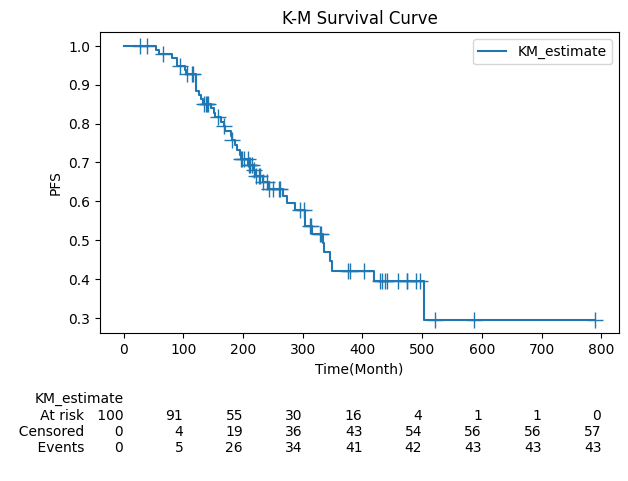

mPFS: 334.0
95% CI for mPFS of 169:        KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                  1.000000                1.000000
27.0                 1.000000                1.000000
39.0                 1.000000                1.000000
54.0                 0.929775                0.998556
59.0                 0.920860                0.994857
66.0                 0.920860                0.994857
81.0                 0.907781                0.989988
89.0                 0.894361                0.984401
90.0                 0.881039                0.978304
95.0                 0.881039                0.978304
102.0                0.867662                0.971770
104.0                0.854512                0.964919
106.0                0.854512                0.964919
115.0                0.854512                0.964919
116.0                0.854512                0.964919
121.0                0.840623                0.957565
122.0                0.800435                0

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

data = {
    'Time': 统计['PFS时间'],
    'Event': 统计['有无PFS事件']
}
df = pd.DataFrame(data)
# Create a new column for censoring information
#df['Censor'] = np.where(df['event'] == 1, 1, 0)
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Plot the KM curve
#kmf.plot_survival_function(ci_show=False,at_risk_counts=True,show_censors=True)

ax = kmf.plot_survival_function(ci_show=False, at_risk_counts=True, show_censors=True)

# Add a title and label the axes
ax.set_title("K-M Survival Curve")
ax.set_xlabel("Time(Month)")
ax.set_ylabel("PFS")

# Show the plot
plt.show()
mpfs = kmf.median_survival_time_

# Print the mPFS
print("mPFS:", mpfs)

# Calculate 95% confidence interval
#ci = kmf.confidence_interval_()
#print("95% CI:", ci)

ci = kmf.confidence_interval_

# Print the 95% CI
print("95% CI for mPFS of 169:", ci.to_string(index=True, max_rows=100))

pfs_1_year = kmf.predict(365)
pfs_half_year = kmf.predict(182 )

# Print the PFS values
#print("1-year PFS:", pfs_1_year)
#print("half-year PFS:", pfs_half_year)

# Get the survival probabilities and confidence intervals
survival_probs = kmf.survival_function_
confidence_intervals = kmf.confidence_interval_survival_function_

# Find the mPFS
mPFS = survival_probs.index[survival_probs.iloc[:, 0] <= 0.5].min()

# Find the 95% CI for mPFS
ci_lower = confidence_intervals.iloc[:, 0].reindex([mPFS]).values[0]
ci_upper = confidence_intervals.iloc[:, 1].reindex([mPFS]).values[0]

# Print the results
print("mPFS:", mPFS)
print("95% CI:", (ci_lower, ci_upper))


In [58]:

# Convert date columns to datetime data type
紫杉醇用药时间={'start':统计['紫杉醇脂质体开始日期'] ,'end': 统计['紫杉醇脂质体结束日期']}
紫杉醇时间=pd.DataFrame(紫杉醇用药时间)
紫杉醇时间['start'] = pd.to_datetime(紫杉醇时间['start'] )
紫杉醇时间['end'] = pd.to_datetime(紫杉醇时间['end'])

# Subtract the columns and create a new column with the result
紫杉醇时间['date_difference'] = 紫杉醇时间['end'] - 紫杉醇时间['start']

# Print the resulting dataset

print(紫杉醇时间['date_difference'])



0     0 days
1     0 days
2    59 days
3    28 days
4     0 days
       ...  
95   51 days
96   23 days
97   26 days
98    0 days
99   38 days
Name: date_difference, Length: 100, dtype: timedelta64[ns]


In [59]:
统计['date_difference']=紫杉醇时间['date_difference']

统计['date_difference'] = 统计['date_difference'].apply(lambda x: x.total_seconds())

# Print the DataFrame with the converted values


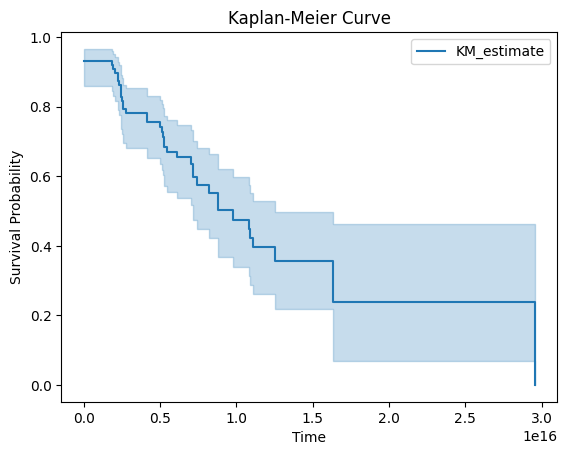

mPFS: 9763200000000000.0


In [60]:
data = {
    'time': 紫杉醇时间['date_difference'],
    'event': 统计['有无PFS事件']
}
df = pd.DataFrame(data)

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])
# Generate KM curve
kmf.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve')
plt.show()

mpfs = kmf.median_survival_time_

# Print the mPFS
print("mPFS:", mpfs)

In [61]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create two sample datasets for comparison
group1 = {
    'time': 统计['df_time'],
    'event': 统计['有无PFS事件']
}

group2 = {
    'time': 统计['df_time'],
    'event': 统计['NAPFS']
}

df_group1 = pd.DataFrame(group1)
df_group2 = pd.DataFrame(group2)

# Fit Kaplan-Meier estimators for each group
kmf_group1 = KaplanMeierFitter()
kmf_group1.fit(df_group1['time'], event_observed=df_group1['event'])

kmf_group2 = KaplanMeierFitter()
kmf_group2.fit(df_group2['time'], event_observed=df_group2['event'])

# Perform log-rank test
results = logrank_test(df_group1['time'], df_group2['time'], df_group1['event'], df_group2['event'])

# Print the log-rank test statistic and p-value
print("Log-Rank Test Statistic: %.2f" % results.test_statistic)
print("Log-Rank Test p-value: %.4f" % results.p_value)

KeyError: 'NAPFS'

In [ ]:
#logrank for 2 groups
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create two sample datasets for comparison
group1 = {
    'time': [10, 15, 20, 25, 30],
    'event': [1, 0, 1, 0, 1]
}

group2 = {
    'time': [5, 10, 15, 20, 25],
    'event': [1, 1, 0, 1, 0]
}

df_group1 = pd.DataFrame(group1)
df_group2 = pd.DataFrame(group2)

# Fit Kaplan-Meier estimators for each group
kmf_group1 = KaplanMeierFitter()
kmf_group1.fit(df_group1['time'], event_observed=df_group1['event'])

kmf_group2 = KaplanMeierFitter()
kmf_group2.fit(df_group2['time'], event_observed=df_group2['event'])

# Perform log-rank test
results = logrank_test(df_group1['time'], df_group2['time'], df_group1['event'], df_group2['event'])

# Print the log-rank test statistic and p-value
print("Log-Rank Test Statistic: %.2f" % results.test_statistic)
print("Log-Rank Test p-value: %.4f" % results.p_value)

Log-Rank Test Statistic: 0.63
Log-Rank Test p-value: 0.4269


In [ ]:
#recoding for cox model
#print(年龄recode)
统计['age']=年龄recode['Age_Category']
#sex
# Example DataFrame
data = {'Gender': 统计['性别']}
sex = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
sex['Gender'] = sex['Gender'].replace({'男': 1, '女': 0})
# Print the updated DataFrame
#print(sex)

统计['sex']=sex

# recoding bingli
统计['清病理']=统计['清病理'].fillna(0)


data = {'病理': 统计['清病理']}
bingli = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
bingli['病理'] = bingli['病理'].replace({'鳞状细胞癌': 0, '非小细胞癌': 1,'腺癌':2})
# Print the updated DataFrame
#print(bingli)

统计['bingli']=bingli

#TNM
data = {'TNM分期': 统计['TNMre']}
tnm = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
tnm['TNM分期'] = tnm['TNM分期'].replace({'III': 0, 'IV': 1})
# Print the updated DataFrame
#print(tnm)

统计['tnm']=tnm

#EGFR
# Create a DataFrame with 59 occurrences of 1 and 41 occurrences of 0
data = {'Column': [1] * 1 + [0] * 99}
dfq = pd.DataFrame(data)

# Print the DataFrame
print(dfq)

统计['egfr']=dfq

import pandas as pd

# Create a DataFrame with 59 occurrences of 1 and 41 occurrences of 0
data = {'Column': [1] * 59 + [0] * 41}
df = pd.DataFrame(data)

# Print the DataFrame
#print(df)

统计['orr']=df
data1 = {'Column': [1] * 34 + [0] * 66}
df1 = pd.DataFrame(data1)

# Print the DataFrame
#print(df1)

统计['不良反应大于三级']=df1
data = {'最大用药': 统计['最大用药周期数更新']}
最大用药 = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
最大用药['最大用药'] = 最大用药['最大用药'].replace({2: 0, 3: 0,4:1,5:1,6:1,7:1,8:1})
# Print the updated DataFrame
#print(bingli)
统计['最大用药']=最大用药


data = {'联合免疫': 统计['联合免疫用药周期数']}
联合免疫 = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
联合免疫['联合免疫'] = 联合免疫['联合免疫'].replace({1:0,2: 0, 3: 0,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1})
# Print the updated DataFrame
#print(bingli)
统计['联合免疫']=联合免疫




data = {'紫杉醇剂量': 统计['紫杉醇脂质体总剂量（mg）']}

紫杉醇剂量 = pd.DataFrame(data)

紫杉醇剂量['紫杉醇剂量'] = np.where(紫杉醇剂量['紫杉醇剂量'] <= 794, 0, 1)

统计['紫杉醇剂量']=紫杉醇剂量




    Column
0        1
1        0
2        0
3        0
4        0
..     ...
95       0
96       0
97       0
98       0
99       0

[100 rows x 1 columns]


TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [ ]:
print(统计['df_time'])

0     334.6
1       0.0
2     419.8
3     150.0
4       0.0
      ...  
95      0.0
96      0.0
97      0.0
98     68.8
99     48.4
Name: df_time, Length: 100, dtype: float64


In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

# Create a sample dataset
data = {
    'time': 统计['PFS时间'],
    'event': 统计['有无PFS事件'],
    'age': 统计['age'],
    'sex': 统计['sex'],
    'bingli': 统计['bingli'],
    'tnm': 统计['tnm'] ,
    'orr': 统计['orr'],
    '最大用药': 统计['最大用药'],
    '紫杉醇剂量': 统计['紫杉醇剂量'],
    '联合免疫': 统计['联合免疫'],
    'kabo': 统计['kabo']
}

df = pd.DataFrame(data)

# Fit Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(df, 'time', event_col='event', show_progress=False)

# Get the hazard ratios
hr = cph.hazard_ratios_
#print(hr)
# 95%CI and logrank
# Print the hazard ratios
ci = cph.confidence_intervals_.apply(np.exp)
#print("95% CI:", ci)

results = logrank_test (df['time'], df['event'], df['time'])

# Extract the p-value from the test results
p_value = results.p_value

#Print the log-rank p-value
print("Log-rank p-value:", p_value)

#print(cph.summary['p'])
#print(cph.summary)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
## 三. 疗效评估

In [ ]:
疗效评价=统计['最佳疗效']

# number of PR
# Count the occurrences of a specific string in a column
PR = 'PR'
count = (统计['最佳疗效'] == PR).sum()
# Print the count
print("Count of '{}' is {}".format(PR, count))

# number of SD
# Count the occurrences of a specific string in a column
SD = 'SD'
count = (统计['最佳疗效'] == SD).sum()
# Print the count
print("Count of '{}' is {}".format(SD, count))

# number of PD
# Count the occurrences of a specific string in a column
PD = 'PD'
count = (统计['最佳疗效'] == PD).sum()
# Print the count
print("Count of '{}' is {}".format(PD, count))
# number of CR
# Count the occurrences of a specific string in a column
CR = 'CR'
count = (统计['最佳疗效'] == CR).sum()
# Print the count
print("Count of '{}' is {}".format(CR, count))

#PR SD PD CR
PR=43/(43+28+4+3)
print("PR='{}'".format(PR))
SD=28/(43+28+4+3)
print("SD='{}'".format(SD))
PD=3/(43+28+4+3)
print("PD='{}'".format(PD))
CR=4/(43+28+4+3)
print("CR='{}'".format(CR))

#ORR DCR
ORR=CR+PR
print("ORR='{}'".format(ORR))
DCR=ORR+SD
print("DCR='{}'".format(DCR))

Count of 'PR' is 43
Count of 'SD' is 28
Count of 'PD' is 3
Count of 'CR' is 4
PR='0.5512820512820513'
SD='0.358974358974359'
PD='0.038461538461538464'
CR='0.05128205128205128'
ORR='0.6025641025641026'
DCR='0.9615384615384617'


In [ ]:
from statsmodels.stats.proportion import proportion_confint

# Calculate 95% CI for ORR
orr_count = int(0.602 * 100)  # Convert percentage to count
orr_total = 100  # Total sample size for ORR
orr_ci = proportion_confint(orr_count, orr_total, alpha=0.05, method='wilson')

print("95% CI for ORR:", orr_ci)

# Calculate 95% CI for DCR
dcr_count = int(0.915 * 100)  # Convert percentage to count
dcr_total = 100  # Total sample size for DCR
dcr_ci = proportion_confint(dcr_count, dcr_total, alpha=0.05, method='wilson')

print("95% CI for DCR:", dcr_ci)

95% CI for ORR: (0.5020025867910618, 0.6905987135675411)
95% CI for DCR: (0.8377378714728368, 0.9519274599974349)


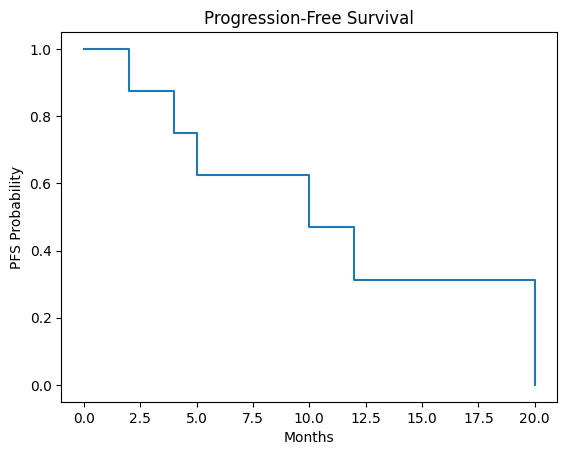

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Example PFS data
data = {'Time': [2, 4, 5, 8, 10, 12, 15, 20],
        'Event': [1, 1, 1, 0, 1, 1, 0, 1]}

df = pd.DataFrame(data)

# Compute Kaplan-Meier estimates
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Create the survival table by month
timeline = range(0, df['Time'].max() + 1)
survival_prob = kmf.survival_function_

# Plot the PFS curve
plt.step(survival_prob.index, survival_prob['KM_estimate'], where="post")
plt.xlabel('Months')
plt.ylabel('PFS Probability')
plt.title('Progression-Free Survival')
plt.show()
